## Exploratory Data Analysis

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Check the Data

In [2]:
# read the csv file
df = pd.read_csv('resale_flat_prices.csv')

# get the top 5 observations
df.head()

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,3,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,4,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,5,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [3]:
# Observe the columns in the file
df.columns

Index(['_id', 'month', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [4]:
# Observe data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225238 entries, 0 to 1225237
Data columns (total 12 columns):
_id                    1225238 non-null int64
month                  1225238 non-null object
town                   1225238 non-null object
flat_type              1225238 non-null object
block                  1225238 non-null object
street_name            1225238 non-null object
storey_range           1225238 non-null object
floor_area_sqm         1225238 non-null float64
flat_model             1225238 non-null object
lease_commence_date    1225238 non-null int64
remaining_lease        109230 non-null object
resale_price           1225238 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 112.2+ MB


##### Things to take note:
    2 columns in float data type
    1 column in integer data type
    8 columns in object data type
    remaining_lease column has only 109230 non-null object as compare to the rest of 1225238 non-null object, 
    which means it contains null values

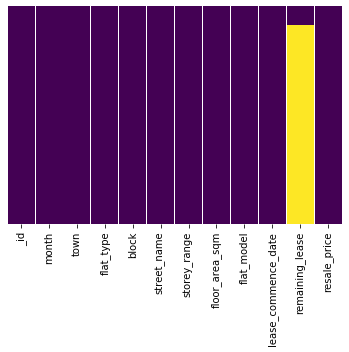

In [5]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap='viridis')

##### Things to take note:
Roughly 91 percent of the remaining_lease data is missing. We would use some form of imputation later to fix it.

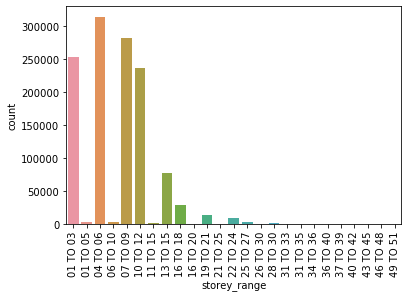

In [6]:
# Sort the storey range in order
sorted_storey_range = df.sort_values(by='storey_range', kind='mergesort')
plt.xticks(rotation=90)

# use countplot to count the number of flat resale in each storey range
sns.countplot(x='storey_range',data=sorted_storey_range)

##### Things to take note:
The most sell storey range are 01-03, 04-06, 07-09 and 10-12. 

There are some storey range can be merged with another one, the count number can be added up or combined as one.

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


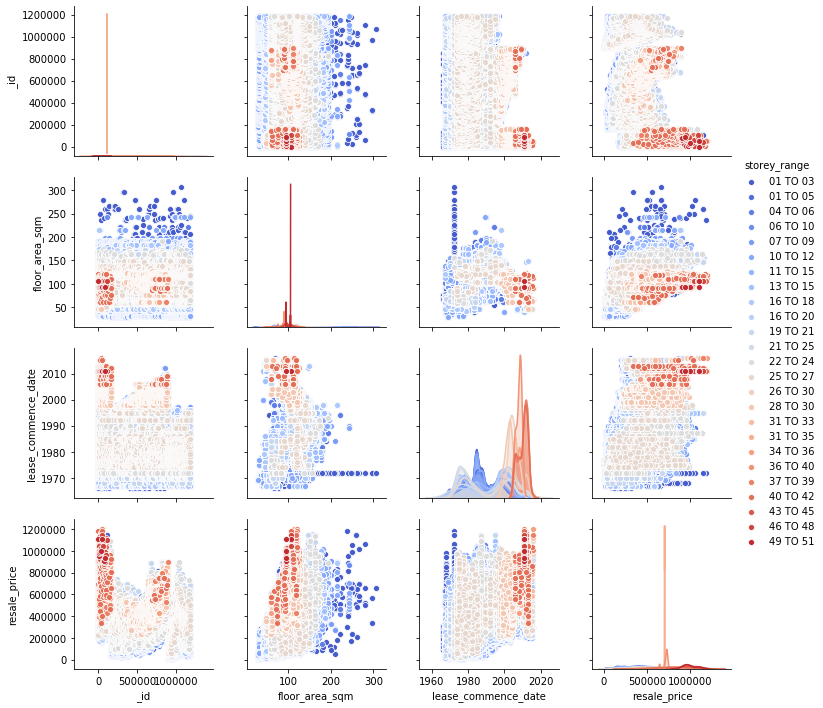

In [7]:
# Use pairplot to compare the relationship across nummerical columns in the dataframe
sns.pairplot(sorted_storey_range,hue='storey_range',palette='coolwarm')

### Things to take note:
1. Most of higher level storey_range flat has larger floor_area_sqm
2. The storey_range has been increased by lease_commence_date
3. Most of high level storey_range flats has higher resale_price
4. The floor_area_sqm has been reduced by the lease_commence_date
5. The resale of higher storey_range flathas been increased by the lease_commence_date
6. The higher storey_range flat with smaller floor_area_sqm has relative similar resale_price as compare to those lower storey_range flat with larger floor_area_sqm

In [8]:
# Observe statistic values in the dataset columns
df.describe()

,_id,floor_area_sqm,lease_commence_date,resale_price
count,1.225238e+06,1.225238e+06,1.225238e+06,1.225238e+06
mean,6.025503e+05,9.534366e+01,1.986984e+03,2.812760e+05
std,3.408018e+05,2.605229e+01,9.274349e+00,1.415369e+05
min,1.000000e+00,2.800000e+01,1.966000e+03,5.000000e+03
25%,3.063102e+05,7.200000e+01,1.980000e+03,1.780000e+05
50%,6.126195e+05,9.300000e+01,1.986000e+03,2.650000e+05
75%,8.989730e+05,1.130000e+02,1.995000e+03,3.660000e+05
max,1.184935e+06,3.070000e+02,2.016000e+03,1.205000e+06


In [9]:
# Matrix form for correlation data
df_matrix = df.corr()
df_matrix

,_id,floor_area_sqm,lease_commence_date,resale_price
_id,1.000000,-0.047073,-0.206229,-0.252592
floor_area_sqm,-0.047073,1.000000,0.517681,0.638827
lease_commence_date,-0.206229,0.517681,1.000000,0.498276
resale_price,-0.252592,0.638827,0.498276,1.000000


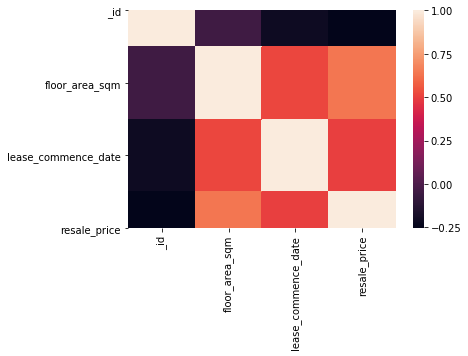

In [10]:
# Plot the heatmap
sns.heatmap(df_matrix)

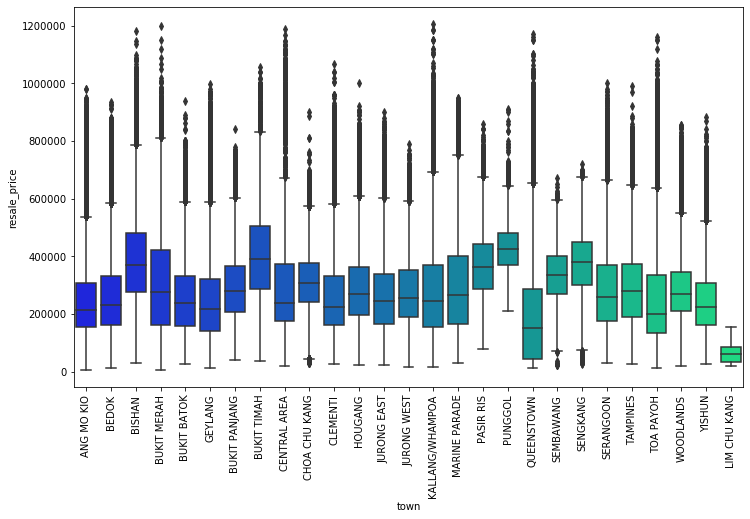

In [11]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.boxplot(x='town',y='resale_price',data=df,palette='winter')

##### Things to take note: 
LIM CHU KANG has overall lowest flat resale price

In [12]:
df_matrix = df.pivot_table(values='resale_price',index='town',columns='lease_commence_date')
df_matrix

lease_commence_date,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
town,,,,,,,,,,,,,,,,,,,,,
ANG MO KIO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,789163.190476,638298.531073,NaN,NaN,NaN,NaN
BEDOK,NaN,NaN,NaN,NaN,116517.333333,NaN,173101.625442,NaN,185779.273217,346679.369128,...,NaN,NaN,NaN,620811.916667,NaN,NaN,NaN,NaN,NaN,NaN
BISHAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156668.062425,223122.727273,NaN,...,NaN,NaN,NaN,NaN,884351.333333,NaN,NaN,NaN,NaN,NaN
BUKIT BATOK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUKIT MERAH,NaN,161630.742958,NaN,139766.587997,220215.220549,184525.980392,124273.037037,248914.881279,306726.581481,199941.061041,...,786678.571429,675373.015152,676514.540541,NaN,NaN,NaN,701766.615012,NaN,NaN,1.023231e+06
BUKIT PANJANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,388972.715232,402871.370787,357522.162162,434007.666667,NaN
BUKIT TIMAH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,348123.527313,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CENTRAL AREA,NaN,NaN,NaN,NaN,NaN,153367.835165,NaN,NaN,201984.346519,243356.000000,...,NaN,NaN,NaN,NaN,924773.955990,NaN,NaN,NaN,NaN,NaN
CHOA CHU KANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,266266.303030,NaN,353686.389610,NaN,365216.705882,NaN


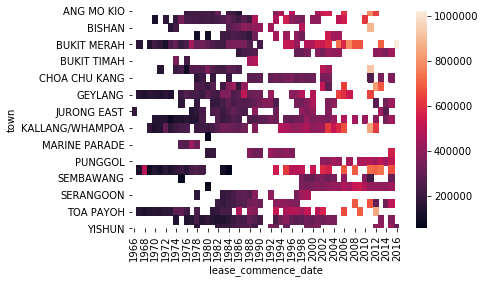

In [13]:
sns.heatmap(df_matrix)

### Data Cleaning

In [14]:
def impute_remaining_lease(cols):
    remaining_lease= cols[0]
    lease_commence_date = cols[1]
    
    
    if pd.isnull(remaining_lease):

        remaining_lease = 99 - (2019-lease_commence_date)
    return remaining_lease

In [15]:
df['remaining_lease'] = df[['remaining_lease','lease_commence_date']].apply(impute_remaining_lease,axis=1)

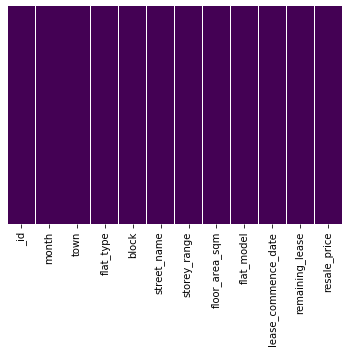

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

##### Things to take note:
The null values in remaining_lease column has been replaced with derived data

In [17]:
# Check the dataframe information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225238 entries, 0 to 1225237
Data columns (total 12 columns):
_id                    1225238 non-null int64
month                  1225238 non-null object
town                   1225238 non-null object
flat_type              1225238 non-null object
block                  1225238 non-null object
street_name            1225238 non-null object
storey_range           1225238 non-null object
floor_area_sqm         1225238 non-null float64
flat_model             1225238 non-null object
lease_commence_date    1225238 non-null int64
remaining_lease        1225238 non-null object
resale_price           1225238 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 112.2+ MB


In [18]:
# get the top 5 observations, the missing value in remaining_lease has been replace integer values
df.head()

,_id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,3,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,4,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,5,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


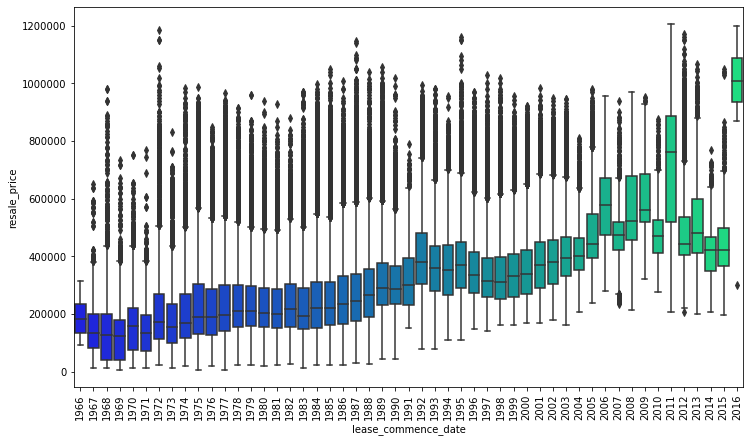

In [19]:
plt.figure(figsize=(12, 7))
plt.xticks(rotation=90)
sns.boxplot(x='lease_commence_date',y='resale_price',data=df,palette='winter')

##### Things to take note:
The overall of HDB flat resale price is increasing by the lease_commence_date, which means the higher of remaining_lease the higher resale_price of HDB flat.  